<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/3_Dropna_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://www.youtube.com/watch?v=EaGbS7eWSs0 ---> 19:00

**Syntax**

- **dropna(self, axis=0, how="any", thresh=None, subset=None, inplace=False)**

- **axis:** possible values are **{0 or ‘index’, 1 or ‘columns’}**
  - default 0.
  - If **0**, **drop rows** with null values.
  - If **1, drop columns** with missing values.

- **how:** possible values are **{‘any’, ‘all’}**
  - default **‘any’**. If ‘any’, drop the row/column if **any of the values** is null.   
  - If **‘all’**, drop the row/column if **all the values** are missing.

- **thresh:** an int value to specify the threshold for the drop operation.

- **subset:** specifies the rows/columns to look for null values.

- **inplace:** a boolean value. If True, the source DataFrame is changed and None is returned.

-----------------

- **df.dropna() and df.dropna(axis=0) ---> both gives same result**

 - **df.dropna() --->  drop all rows with any NaN and NaT values**

 - **df.dropna(axis=0) --->  drop all rows with any NaN and NaT values**

- **df.dropna(axis=1) --->  drop All Columns with Any Missing Value**

--------------

In [2]:
import numpy as np
import pandas as pd

In [ ]:
d1 = {'Name': ['Pankaj', 'Meghna', 'David', 'Lisa'], 'ID': [1, 2, 3, 4], 'Salary': [100, 200, np.nan, pd.NaT],
      'Role': ['CEO', None, pd.NaT, pd.NaT]}

df = pd.DataFrame(d1)

print(df)

     Name  ID Salary  Role
0  Pankaj   1    100   CEO
1  Meghna   2    200  None
2   David   3    NaN   NaT
3    Lisa   4    NaT   NaT


##### **a) drop all rows with any NaN and NaT values (axis=0)**

In [ ]:
# drop all rows with any NaN and NaT values
# This is the default behavior of dropna() function

df1 = df.dropna()
print(df1)

     Name  ID Salary Role
0  Pankaj   1    100  CEO


##### **b) Drop All Columns with Any Missing Value (axis=1)**

In [ ]:
# pass axis=1 to drop columns with the missing values

df1 = df.dropna(axis=1)
print(df1)

     Name  ID
0  Pankaj   1
1  Meghna   2
2   David   3
3    Lisa   4


##### **c) Drop Row/Column Only if All the Values are Null**

In [ ]:
d2 = {'Name': ['Pankaj', 'Meghna', 'David', pd.NaT], 'ID': [1, 2, 3, pd.NaT], 'Salary': [100, 200, np.nan, pd.NaT],
      'Role': [np.nan, np.nan, pd.NaT, pd.NaT]}

df1 = pd.DataFrame(d2)

print(df1)

df2 = df1.dropna(how='all')           # axis=0 --> drops rows; gives same result
print('\n\n', df2)

df3 = df1.dropna(how='all', axis=1)   # axis=1 --> drops columns;
print('\n\n', df3)

     Name   ID Salary Role
0  Pankaj    1    100  NaT
1  Meghna    2    200  NaT
2   David    3    NaN  NaT
3     NaT  NaT    NaT  NaT


      Name ID Salary Role
0  Pankaj  1    100  NaT
1  Meghna  2    200  NaT
2   David  3    NaN  NaT


      Name   ID Salary
0  Pankaj    1    100
1  Meghna    2    200
2   David    3    NaN
3     NaT  NaT    NaT


##### **d) Drop Rows/Columns when the threshold of null values is crossed**

In [ ]:
df4 = df1.dropna(thresh=2)
print(df4)

     Name ID Salary Role
0  Pankaj  1    100  NaT
1  Meghna  2    200  NaT
2   David  3    NaN  NaT


##### **e) Define Labels to look for null values**

In [ ]:
df5 = df1.dropna(subset=['ID'])
print(df5)

     Name ID Salary Role
0  Pankaj  1    100  NaT
1  Meghna  2    200  NaT
2   David  3    NaN  NaT


- The **‘ID’** column is **not dropped** because the missing value is looked only in **index 1 and 2.**

In [ ]:
df6 = df1.dropna(subset=[1, 2], axis=1)
print(df6)

     Name   ID
0  Pankaj    1
1  Meghna    2
2   David    3
3     NaT  NaT


##### **f) Dropping Rows with NA inplace**

- We can pass **inplace=True** to change the source DataFrame itself. It’s useful when the DataFrame size is huge and we want to save some memory.

In [ ]:
d3 = {'Name': ['Pankaj', 'Meghna'], 'ID': [1, 2], 'Salary': [100, pd.NaT]}

df7 = pd.DataFrame(d3)

print(df7)

     Name  ID Salary
0  Pankaj   1    100
1  Meghna   2    NaT


In [ ]:
df7.dropna(inplace=True)
print(df7)

     Name  ID Salary
0  Pankaj   1    100


-------------------

- https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php

In [3]:
df = pd.DataFrame({"name": ['Superman', 'Batman', 'Spiderman'],
                   "toy": [np.nan, 'Batmobile', 'Spiderman toy'],
                   "born": [pd.NaT, pd.Timestamp("1956-06-26"),
                            pd.NaT]})
df

,name,toy,born
0,Superman,NaN,NaT
1,Batman,Batmobile,1956-06-26
2,Spiderman,Spiderman toy,NaT


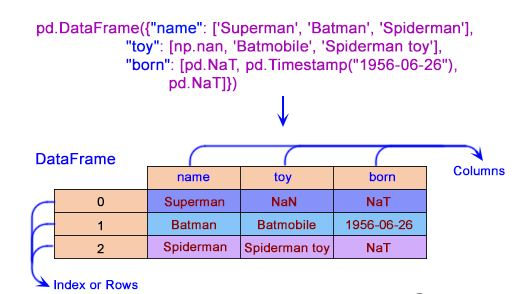

#### **1) Drop the rows where at least one element is missing**

In [5]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1956-06-26


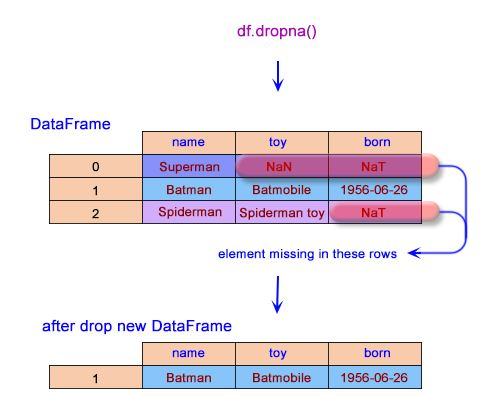

#### **2) Drop the columns where at least one element is missing**

In [6]:
df.dropna(axis='columns')

,name
0,Superman
1,Batman
2,Spiderman


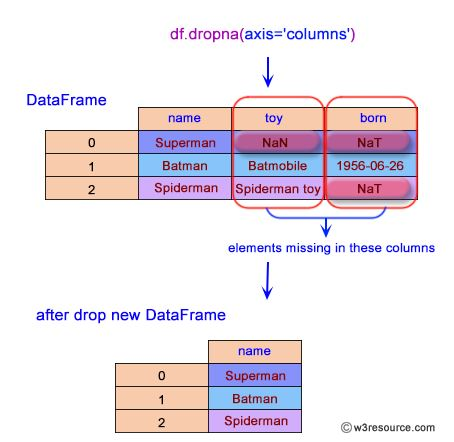

#### **3) Drop the rows where all elements are missing**

In [7]:
df.dropna(how='all')

,name,toy,born
0,Superman,NaN,NaT
1,Batman,Batmobile,1956-06-26
2,Spiderman,Spiderman toy,NaT


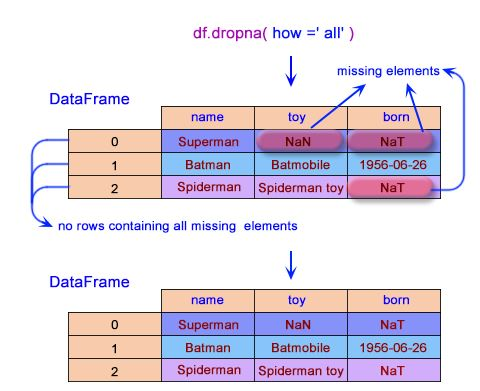

#### **4) Keep only the rows with at least 2 non-NA values**

In [4]:
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1956-06-26
2,Spiderman,Spiderman toy,NaT


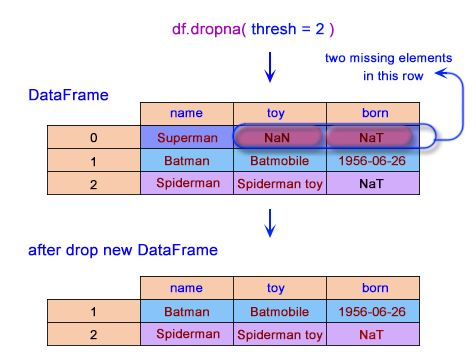

#### **5) Define in which columns to look for missing values**

In [8]:
df.dropna(subset=['name', 'born'])

,name,toy,born
1,Batman,Batmobile,1956-06-26


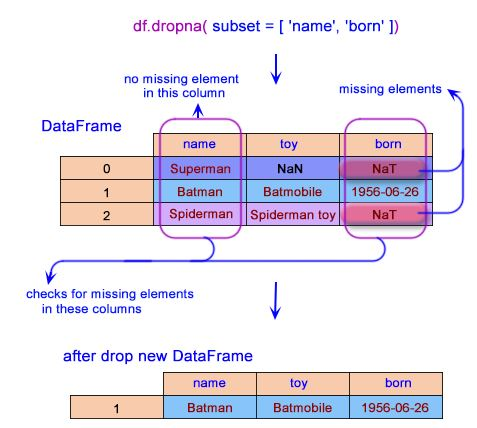

#### **6) Keep the DataFrame with valid entries in the same variable**

In [9]:
df.dropna(inplace=True)
df

,name,toy,born
1,Batman,Batmobile,1956-06-26


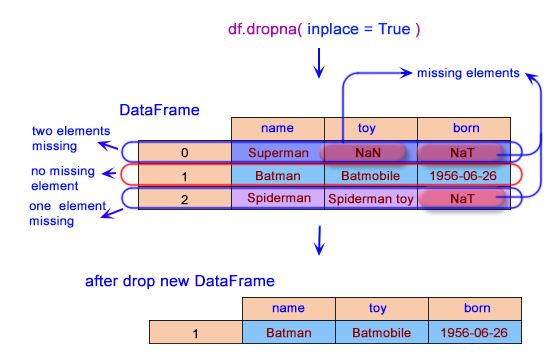

---------------